In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as pgo

In [4]:
df=pd.read_csv('C:/Deepthi_Personal/DataAnalytics 2/Python/Dog_Bite_Analysis/Dog_bite.csv')
df.head()

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 01 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,11220
1,2,January 04 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,NaN
2,3,January 06 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224
3,4,January 08 2018,DOG,Mixed/Other,4,M,False,Brooklyn,11231
4,5,January 09 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224


In [5]:
df.tail()

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
22658,10276,December 24 2017,DOG,CHIWEENIE MIX,7,M,True,Staten Island,10303
22659,10277,December 24 2017,DOG,DUNKER,5,F,True,Staten Island,10303
22660,10278,December 21 2017,DOG,"Schnauzer, Miniature",10M,M,True,Staten Island,10312
22661,10279,December 28 2017,DOG,Mixed/Other,NaN,F,False,Staten Island,10308
22662,10280,December 29 2017,DOG,BOXER/PIT BULL,NaN,M,False,Staten Island,10314


In [8]:
df.shape

(22663, 9)

In [9]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['UniqueID', 'DateOfBite', 'Species', 'Breed', 'Age', 'Gender',
       'SpayNeuter', 'Borough', 'ZipCode'],
      dtype='object')

In [12]:
df.isnull().sum()

UniqueID          0
DateOfBite        0
Species           0
Breed          2218
Age           11221
Gender            0
SpayNeuter        0
Borough           0
ZipCode        5858
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22663 entries, 0 to 22662
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UniqueID    22663 non-null  int64 
 1   DateOfBite  22663 non-null  object
 2   Species     22663 non-null  object
 3   Breed       20445 non-null  object
 4   Age         11442 non-null  object
 5   Gender      22663 non-null  object
 6   SpayNeuter  22663 non-null  bool  
 7   Borough     22663 non-null  object
 8   ZipCode     16805 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 1.4+ MB


In [21]:
object_columns=df.select_dtypes(include=['object']).columns
print("Object_columns:\n",object_columns)

numerical_columns=df.select_dtypes(include=['int64','float64']).columns
print("\n Numerical Columns: ", numerical_columns)

Object_columns:
 Index(['DateOfBite', 'Species', 'Breed', 'Age', 'Gender', 'Borough',
       'ZipCode'],
      dtype='object')

 Numerical Columns:  Index(['UniqueID'], dtype='object')


In [22]:
df['Breed'].fillna('UNKNOWN',inplace=True)
df['ZipCode'].fillna('UNKNOWN',inplace=True)

In [24]:
df['Age']=pd.to_numeric(df['Age'],errors='coerce')

In [25]:
median_age=df['Age'].median()
df['Age'].fillna(median_age,inplace=True)

In [26]:
df.isnull().sum()

UniqueID      0
DateOfBite    0
Species       0
Breed         0
Age           0
Gender        0
SpayNeuter    0
Borough       0
ZipCode       0
dtype: int64

In [28]:
df['DateOfBite']=pd.to_datetime(df['DateOfBite'],format='%B %d %Y')


In [29]:
df

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,2018-01-01,DOG,UNKNOWN,4.0,U,False,Brooklyn,11220
1,2,2018-01-04,DOG,UNKNOWN,4.0,U,False,Brooklyn,UNKNOWN
2,3,2018-01-06,DOG,Pit Bull,4.0,U,False,Brooklyn,11224
3,4,2018-01-08,DOG,Mixed/Other,4.0,M,False,Brooklyn,11231
4,5,2018-01-09,DOG,Pit Bull,4.0,U,False,Brooklyn,11224
...,...,...,...,...,...,...,...,...,...
22658,10276,2017-12-24,DOG,CHIWEENIE MIX,7.0,M,True,Staten Island,10303
22659,10277,2017-12-24,DOG,DUNKER,5.0,F,True,Staten Island,10303
22660,10278,2017-12-21,DOG,"Schnauzer, Miniature",4.0,M,True,Staten Island,10312
22661,10279,2017-12-28,DOG,Mixed/Other,4.0,F,False,Staten Island,10308


In [35]:
categorical_data=['Species','Breed','Gender','SpayNeuter','Borough']
for columns in categorical_data:
    print(columns,":")
    unique_values=df[columns].unique()
    for values in unique_values:
        counts=df[columns].value_counts().get(values,0)
        print('-',f"{values}:{counts} occurences")
          

Species :
- DOG:22663 occurences
Breed :
- UNKNOWN:4567 occurences
- Pit Bull:4004 occurences
- Mixed/Other:559 occurences
- BASENJI:15 occurences
- American Pit Bull Mix / Pit Bull Mix:520 occurences
- MIXED:351 occurences
- Yorkshire Terrier Crossbreed:45 occurences
- Great Dane:44 occurences
- Labradoodle:37 occurences
- West High White Terrier:42 occurences
- American Pit Bull Terrier/Pit Bull:511 occurences
- Poodle, Miniature:63 occurences
- Pekingese:51 occurences
- POODLE X:17 occurences
- Labrador Retriever Crossbreed:160 occurences
- Dachshund Smooth Coat:61 occurences
- Chihuahua:646 occurences
- Yorkshire Terrier:480 occurences
- Shih Tzu:731 occurences
- Pug:41 occurences
- Maltese:371 occurences
- MINATURE PINSCHER X:3 occurences
- TERRIER CROSS:3 occurences
- Dachshund, Wirehaired, Miniature:4 occurences
- AMERICAN STAFF X:1 occurences
- Bichon Frise:72 occurences
- German Shepherd:622 occurences
- MIXED BREED:388 occurences
- Labrador Retriever:282 occurences
- Rottweil

- WESTIE TERRIER:1 occurences
- AMERICAN PIT/LABRADOR RETRIEVER X:1 occurences
- BRITTANY PIT BULL X:1 occurences
- JINDO X:1 occurences
- SOFT COATED WHEATEN TERRIER:1 occurences
- MINATURE POODLE X:1 occurences
- Schnauzer, Giant:6 occurences
- LLEWELIN SETTER:1 occurences
- SHEEPADOODLE:1 occurences
- ROTTWEILER X:4 occurences
- KOREAN MIXED BREED:1 occurences
- MASTIFF:39 occurences
- DUTCH SHEPHERD/BELGIAN MALINOIS X:1 occurences
- DANDIE DINMONT:1 occurences
- BERNADOODLE:1 occurences
- RED NOSE PIT BULL:4 occurences
- MINI GOLDEN DOODLE:4 occurences
- Bouvier Des Flandres:4 occurences
- HUSKY/PIT BULL X:1 occurences
- POMERANIAN / YORKIE MIX:1 occurences
- MEXICAN HAIRLESS:1 occurences
- CAVAPOO:2 occurences
- German Pinscher:6 occurences
- PAPILLON / PIT BULL MIX:1 occurences
- LARGE MIX BREED:32 occurences
- Welsh Corgi, Cardigan:4 occurences
- WEIMARANER/SHAR-PEI MIX:1 occurences
- JACK RUSSEL/BOSTON TERRIER MIX:1 occurences
- JACK RUSSELL / POODLE MIX:1 occurences
- CHIHUAHU

- PIT BULL / DALMATION MIX:1 occurences
- MINI PINSCHER MIX:1 occurences
- MIXED SHEPHERD:1 occurences
- MEDIUM BREED:1 occurences
- SHIH TZU PUG:1 occurences
- SHEEPDOG:3 occurences
- PIT BULL TERRIER:6 occurences
- Russian Wolfhound:1 occurences
- POMERANIAN/TERRER MIX:1 occurences
- 2 BULL TERRIER DOGS:1 occurences
- TOY POODLE MIX:1 occurences
- TERRIER, JACK RUSSELL MIX:1 occurences
- AIREDALE TERRIER:5 occurences
- Japanese Chin/Spaniel:4 occurences
- DACHSHUND, MINIATURE:1 occurences
- MALTI POO DOG:1 occurences
- SHIHTZU/MALTESE MIX:2 occurences
- COCKER SPANIEL POODLE MIX:1 occurences
- YORKIE/TERRIER MIX:2 occurences
- BULLDOG MIX:4 occurences
- LARGE POODLE:1 occurences
- SHIHTZU MIX:4 occurences
- HUSKY/GERMAN SHEPHERD MIX:1 occurences
- MIXED BREED PITBULL:1 occurences
- CATTLE MIX:1 occurences
- HUSKY MIX:7 occurences
- SHEPERD/HUSKY MIX:1 occurences
- SHEPERD MIX:1 occurences
- MICROMINI BERNEDOODLE:1 occurences
- SHIHTZU-POODLE MIX:2 occurences
- PITBULL/BOXER MIX:2 occ

- HUSKY / MALAMUTE MIX:1 occurences
- AMERICAN HAIRLESS TERRIER:1 occurences
- PIT BULL / ROTTWEILER:1 occurences
- BULL TERRIER:1 occurences
- SHEPHERD / HUSKY:1 occurences
- CESKY TERRIER:1 occurences
- CAROLINA MIX:1 occurences
- CAVAPOO MIX:1 occurences
- SHEPHERD / HOUND MIX:1 occurences
- PIT BULL / AMERICAN STAFFORDSHIRE:1 occurences
- AMERICAN BULL TERRIER:1 occurences
- CHINESE SHAR-PEI MIX:1 occurences
- MALTI-POO MIX:1 occurences
- MINI SAINT BERDOODLE MIX:1 occurences
- Pointer, German Shorthaired:6 occurences
- CORGI / AUSTRALIAN SHEPHERD MIX:1 occurences
- PEKINGESE MIX:3 occurences
- Saluki:1 occurences
- POODLE / YORKIE MIX:1 occurences
- LABRADOR / PIT BULL:2 occurences
- PITBULL TERRIER MIX:2 occurences
- BEAGLE / SHAR-PEI MIX:2 occurences
- ROTTWEILER / SHEPHERD MIX:2 occurences
- AMERICAN COONHOUND:1 occurences
- SHIH TZU / PUG MIX:1 occurences
- POMERANIAN / CHIHUAHUA MIX:3 occurences
- PIT BULL / BOXER:1 occurences
- BICHON / MALTIPOO:1 occurences
- CHIHUAHUA / CO

- MINI PINSCHER/ CHIHUAHUA:1 occurences
- SHIH TZU/ PEKINGESE:1 occurences
- BORDER COLLIE & AUSTRALIAN BLUE HEELER:1 occurences
- RED NOSE PIT:1 occurences
- STAFFORDSHIRE TERRIER:1 occurences
- JACK RUSS TER/ BEAGLE:1 occurences
- SHIH TZU/POODLE:4 occurences
- POODLE- X:1 occurences
- POMERANIAN ENGLISH SPANIEL:1 occurences
- BEAGLE/ ENG SPRINGER SPANIEL:1 occurences
- BULLDOG/ PIT BULL:1 occurences
- SHIH TZU/ YORKSHIRE TERR:1 occurences
- TERRIER/ YORKIE:1 occurences
- JACK RUSS/BULLY PIT BULL:1 occurences
- AKITA/CHOW CHOW:1 occurences
- PITBULL/LABRADOR:2 occurences
- AUSTRALIAN SHEP/DALMATION/PITBULL:1 occurences
- BEAGLE/BLUETICK HOUND:1 occurences
- SCHNAUZER/MALTESE:1 occurences
- CHIHUAHUA- X:1 occurences
- ALASKA HUSKY:1 occurences
- MINI DOBERMAN:1 occurences
- POODLE CHIHUAHUA:1 occurences
- YORKY-POODLE:1 occurences
- GERMAN SHEP/ ROTTWEILER:1 occurences
- PARSON TERR:1 occurences
- Irish Terrier:1 occurences
- Schipperkee:1 occurences
- Puli:1 occurences
- CHIHUAHUA/SH

- ALASKAN HUSKY/LABRADOR RETR:1 occurences
- ALAPAHA BULLDOG:1 occurences
- CANE CORSO/GERMAN SHEP:1 occurences
- SHIH TZU/CHIHUAHUA X:1 occurences
- LAB/PIT BULL/CHIHUAHUA X:1 occurences
- SHIH TZU/BICHON FRISE MIX:1 occurences
- LAB/PIT BULL:1 occurences
- PIT BULL/DACHSHUND:1 occurences
- CHIHUAHUA/DASHUND:1 occurences
- TIBETAN MASTIFF:1 occurences
- HUNGARIAN SHEEP DOG:1 occurences
- GERMAN SHEP/ROTTWEILER:1 occurences
- LAB RETRIEVER/ PIT BULL:1 occurences
- CHOW MIX:2 occurences
- FRENCH POODLE MIX:1 occurences
- CHIHUAHUA -X:1 occurences
- PIT BULL X/BEAGLE:1 occurences
- COCKER SPANIEL/CAVALIER:1 occurences
- PITBULL/LABRADOR MIX:2 occurences
- YORKIE/MALTESE:1 occurences
- PIT BULL/LAB RETRIEVER:1 occurences
- ESKIMO/CHIHUAHUA:1 occurences
- CHOW CHOW/AKITA X:1 occurences
- YORKIE/PODDLE:1 occurences
- LHASA APSO/DACHSHUND:1 occurences
- RIDGEBACK GERMAN SHEP X:1 occurences
- LAB RETRIEVER/ HOUND:1 occurences
- LAB RETRIEVER/GERM SHEP:1 occurences
- LABRADOR RETR./JACK RUSS. 

- False:16787 occurences
- True:5876 occurences
Borough :
- Brooklyn:4985 occurences
- Manhattan:5270 occurences
- Bronx:3782 occurences
- Other:981 occurences
- Queens:5773 occurences
- Staten Island:1872 occurences


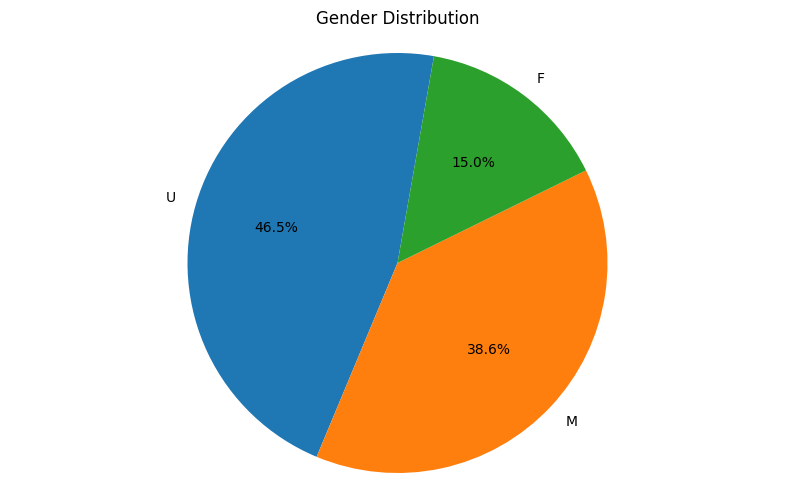

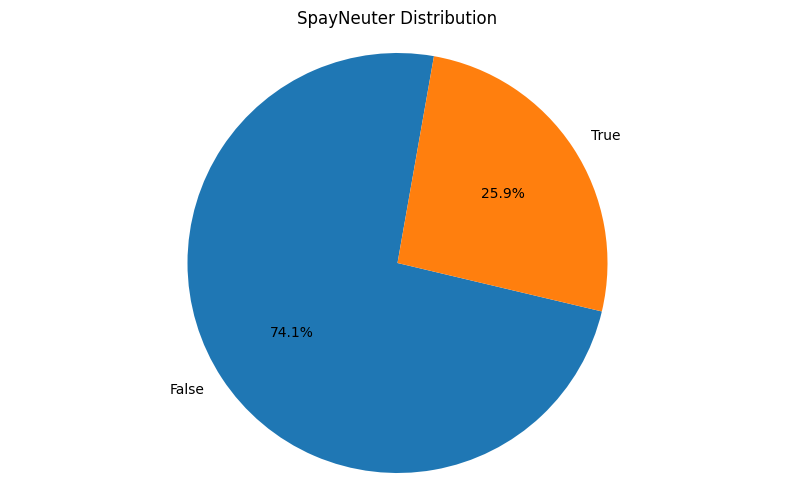

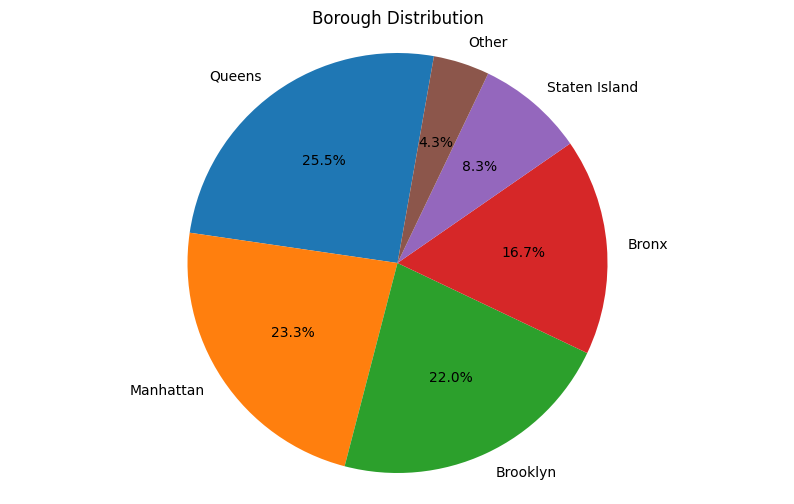

In [39]:
categorical_data=['Gender','SpayNeuter','Borough']
for column in categorical_data:
    plt.figure(figsize=(10,6))
    counts=df[column].value_counts()
    plt.pie(counts,labels=counts.index,autopct='%1.1f%%',startangle=80)
    plt.title(f'{column} Distribution')
    plt.axis('equal')
    plt.show()

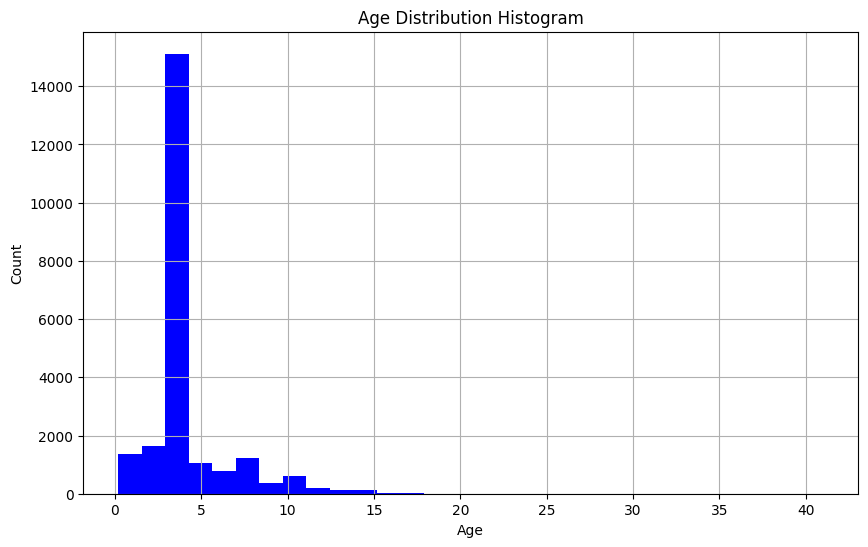

In [40]:
plt.figure(figsize=(10,6))
plt.hist(df['Age'],bins=30,color='blue')
plt.title('Age Distribution Histogram')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

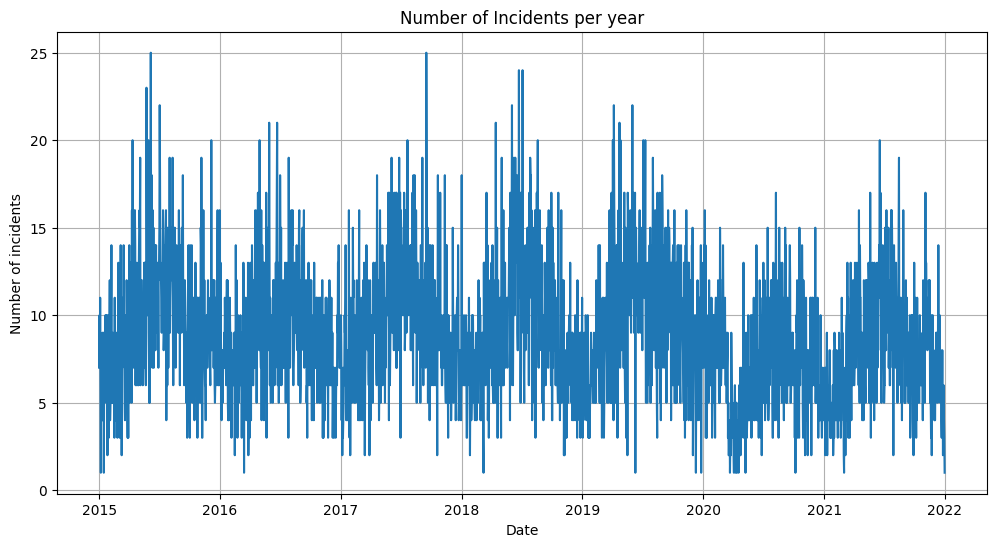

In [43]:
daily_incidents=df.groupby('DateOfBite').size()
plt.figure(figsize=(12,6))
plt.plot(daily_incidents.index,daily_incidents.values)
plt.title('Number of Incidents per year')
plt.xlabel('Date')
plt.ylabel('Number of incidents')
plt.grid(True)
plt.show()

In [53]:
fig=px.line(x=daily_incidents.index,y=daily_incidents.values,title='Daily Animal Bites during every year')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Number of incidents')
fig.show()

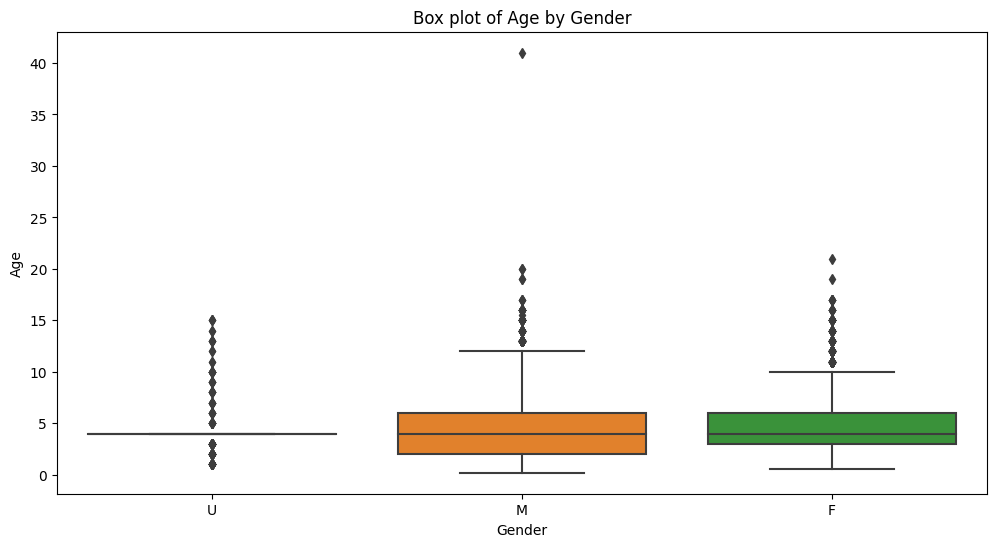

In [46]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Gender',y='Age',data=df)
plt.title('Box plot of Age by Gender')
plt.show()

In [47]:
df['Year']=df['DateOfBite'].dt.year
df['Month']=df['DateOfBite'].dt.month
df['Day']=df['DateOfBite'].dt.day
df['DayOfWeek']=df['DateOfBite'].dt.dayofweek
df

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode,Year,Month,Day,DayOfWeek
0,1,2018-01-01,DOG,UNKNOWN,4.0,U,False,Brooklyn,11220,2018,1,1,0
1,2,2018-01-04,DOG,UNKNOWN,4.0,U,False,Brooklyn,UNKNOWN,2018,1,4,3
2,3,2018-01-06,DOG,Pit Bull,4.0,U,False,Brooklyn,11224,2018,1,6,5
3,4,2018-01-08,DOG,Mixed/Other,4.0,M,False,Brooklyn,11231,2018,1,8,0
4,5,2018-01-09,DOG,Pit Bull,4.0,U,False,Brooklyn,11224,2018,1,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22658,10276,2017-12-24,DOG,CHIWEENIE MIX,7.0,M,True,Staten Island,10303,2017,12,24,6
22659,10277,2017-12-24,DOG,DUNKER,5.0,F,True,Staten Island,10303,2017,12,24,6
22660,10278,2017-12-21,DOG,"Schnauzer, Miniature",4.0,M,True,Staten Island,10312,2017,12,21,3
22661,10279,2017-12-28,DOG,Mixed/Other,4.0,F,False,Staten Island,10308,2017,12,28,3


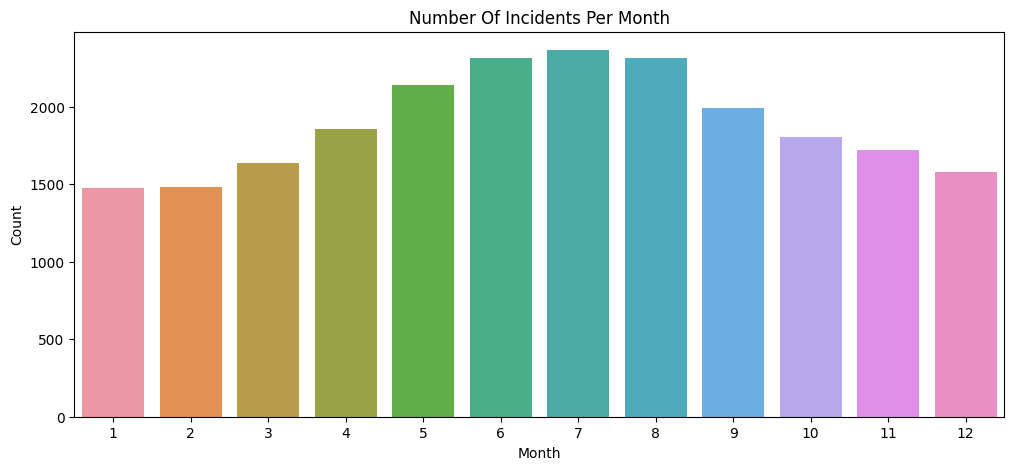

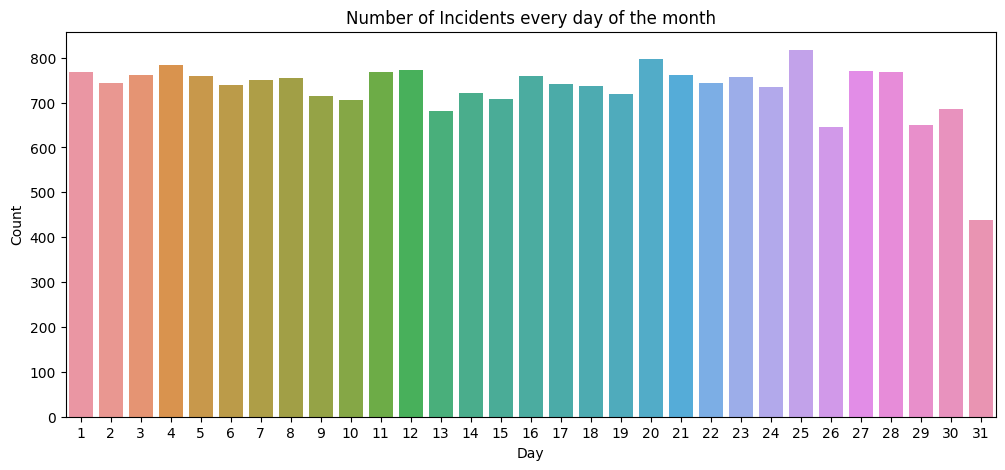

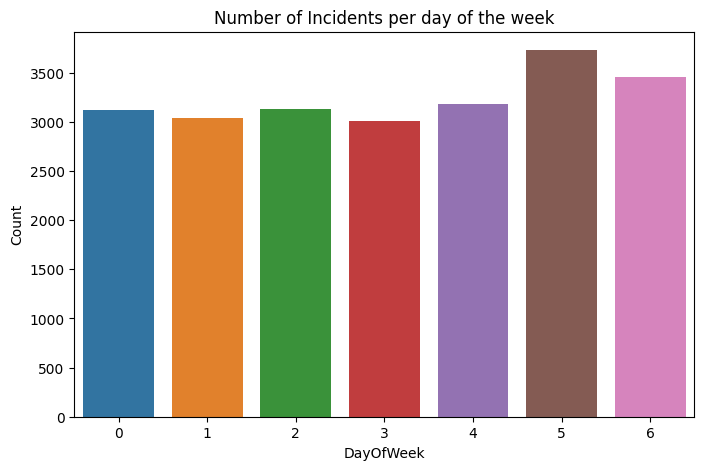

In [49]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='Month')
plt.title('Number Of Incidents Per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12,5))
sns.countplot(data=df,x='Day')
plt.title('Number of Incidents every day of the month')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(data=df,x='DayOfWeek')
plt.title('Number of Incidents per day of the week')
plt.xlabel('DayOfWeek')
plt.ylabel('Count')
plt.show()

In [50]:
df_corr=df.corr()
df_corr


C:\Users\deepu\AppData\Local\Temp\ipykernel_25948\1946342144.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,UniqueID,Age,SpayNeuter,Year,Month,Day,DayOfWeek
UniqueID,1.000000,0.026143,0.047549,0.238415,0.058734,0.002007,0.007454
Age,0.026143,1.000000,0.210833,0.011134,-0.003584,0.016716,-0.004185
SpayNeuter,0.047549,0.210833,1.000000,-0.072400,-0.009197,0.004277,-0.003070
Year,0.238415,0.011134,-0.072400,1.000000,-0.002998,0.005436,0.000870
Month,0.058734,-0.003584,-0.009197,-0.002998,1.000000,0.002682,-0.001244
Day,0.002007,0.016716,0.004277,0.005436,0.002682,1.000000,0.003582
DayOfWeek,0.007454,-0.004185,-0.003070,0.000870,-0.001244,0.003582,1.000000


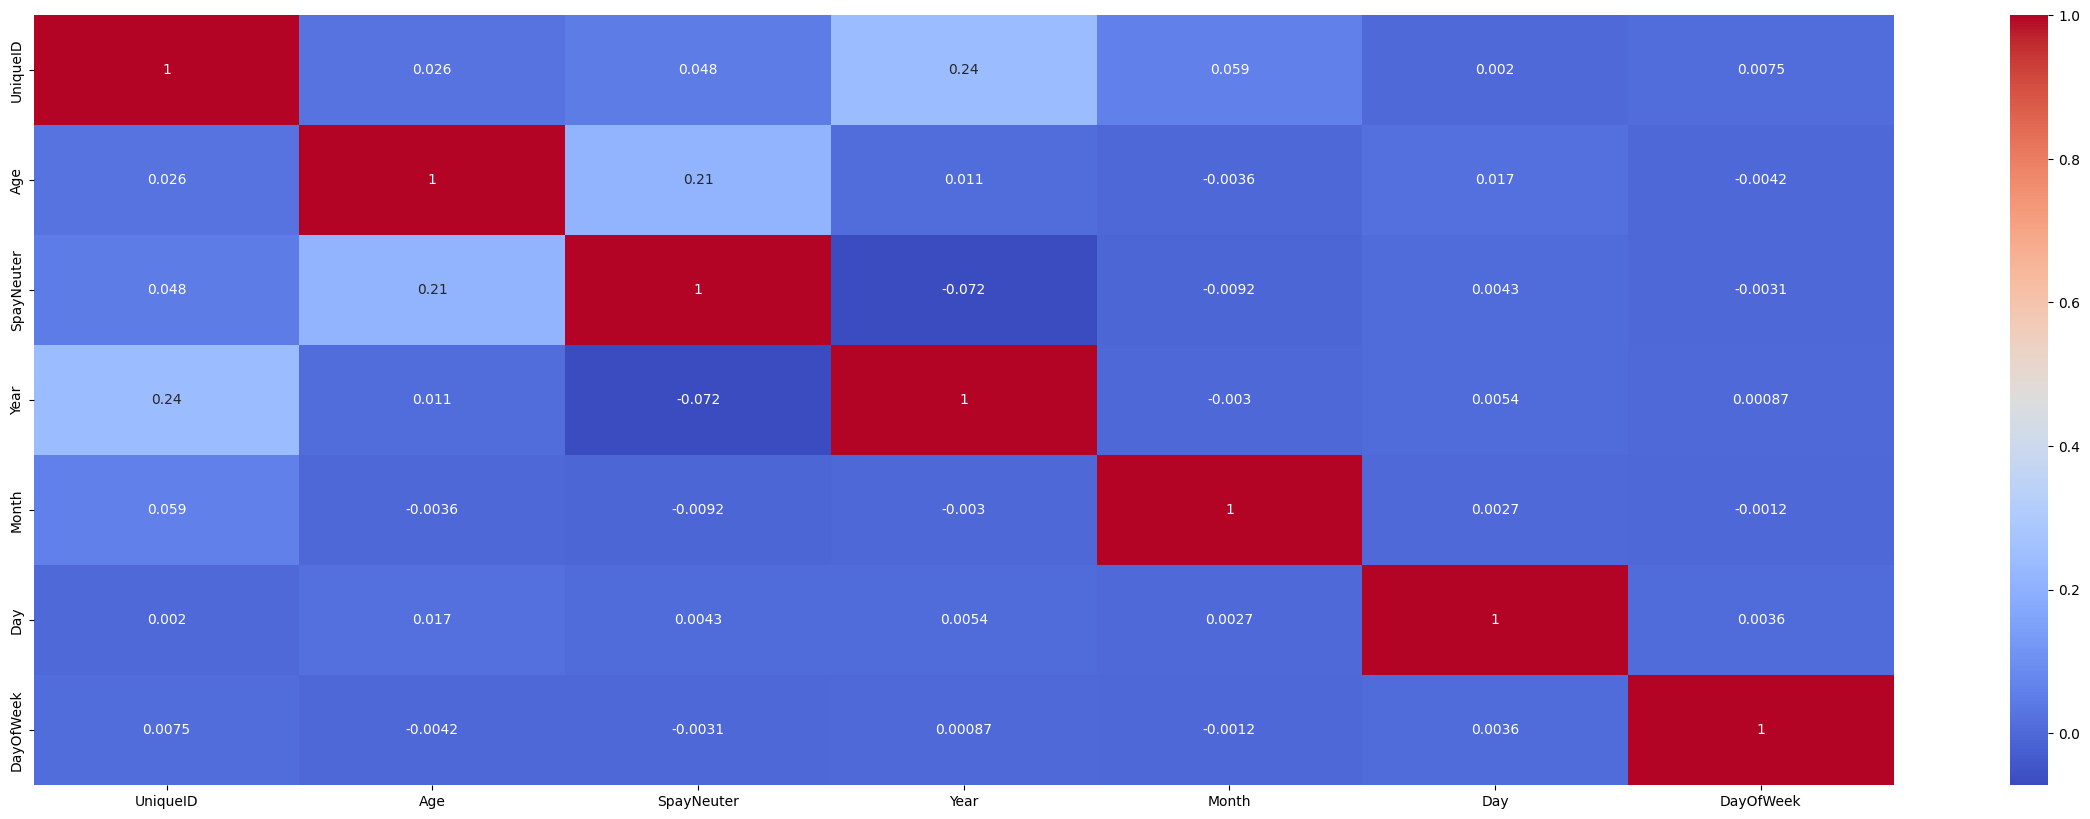

In [52]:
plt.figure(figsize=(30,10))
sns.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.show()